In [0]:
finalCleanDF = spark.read.parquet("/FileStore/tables/XunYin_files/finalCleanDF")
finalCleanDF.show()

+--------------------+------+-------+------------+-------------+-----+------------+--------------------+----------+----------+--------------------+----------+
|         business_id|  city|is_open|review_count|overall_stars|state|review_stars|                text|      year|      date|           tips_text| tips_date|
+--------------------+------+-------+------------+-------------+-----+------------+--------------------+----------+----------+--------------------+----------+
|-0P5rq9DlJgXnfB32...|Austin|      1|          13|          4.5|   TX|           3|"I walked past th...|2020-01-01|2020-03-08|You can't go wron...|2020-02-21|
|-0P5rq9DlJgXnfB32...|Austin|      1|          13|          4.5|   TX|           3|"I walked past th...|2020-01-01|2020-03-08|Good food for gre...|2019-06-11|
|-0P5rq9DlJgXnfB32...|Austin|      1|          13|          4.5|   TX|           5|"Ever since it op...|2020-01-01|2020-01-08|You can't go wron...|2020-02-21|
|-0P5rq9DlJgXnfB32...|Austin|      1|         

In [0]:
closed_stars_rangeDF = spark.read.parquet("/FileStore/tables/XunYin_files/closed_stars_rangeDF")
closed_stars_rangeDF.display()

overall_stars,num_of_ratings
1.0,44
1.5,213
2.0,727
2.5,1775
3.0,3779
3.5,5101
4.0,4579
4.5,2139
5.0,396


In [0]:
open_stars_rangeDF = spark.read.parquet("/FileStore/tables/XunYin_files/open_stars_rangeDF")
open_stars_rangeDF.display()

overall_stars,num_of_ratings
1.0,136
1.5,742
2.0,1719
2.5,2591
3.0,4551
3.5,7554
4.0,8771
4.5,4971
5.0,1028


In [0]:
closed_state_DF = spark.read.parquet("/FileStore/tables/XunYin_files/closed_state_DF")

In [0]:
open_state_DF = spark.read.parquet("/FileStore/tables/XunYin_files/open_state_DF")

In [0]:
review_2019DF = spark.read.parquet("/FileStore/tables/XunYin_files/review_2019DF")

In [0]:
review_2020DF = spark.read.parquet("/FileStore/tables/XunYin_files/review_2020DF")

In [0]:
num_reviews_2019 = spark.read.parquet("/FileStore/tables/XunYin_files/num_reviews_2019")

In [0]:
num_reviews_2020 = spark.read.parquet("/FileStore/tables/XunYin_files/num_reviews_2020")

In [0]:
closed_avg_stars = spark.read.parquet("/FileStore/tables/XunYin_files/closed_avg_stars")

In [0]:
open_avg_stars = spark.read.parquet("/FileStore/tables/XunYin_files/open_avg_stars")

In [0]:
wordcountDF = spark.read.parquet("/FileStore/tables/XunYin_files/wordcountDF")

In [0]:
top_wordcountDF = spark.read.parquet("/FileStore/tables/XunYin_files/top_wordcountDF")

### Each overall ratings from 1 - 5 for businesses open and closed
In this visualisation, we can see that for restaurants that are still open, the overall ratings are scaled to the most right while the restaurants that is closed already, the overall ratings are at around 3.5 which has a lower rating as compared to restaurants that is still open. Thus, the restaurants that are still open perfoming better and ratings mostly are at around 4 and above.

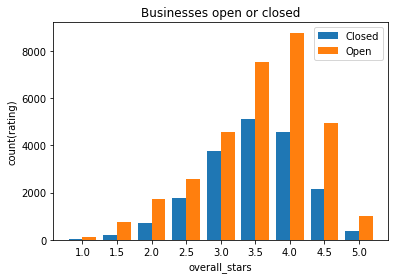

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ratings0DF = closed_stars_rangeDF.toPandas()
ratings1DF = open_stars_rangeDF.toPandas()

plt.figure()

stars = ratings0DF.overall_stars
closed = ratings0DF.num_of_ratings
open = ratings1DF.num_of_ratings

x_axis = np.arange(len(stars))

plt.bar(x_axis -0.2, closed, width=0.4, label = 'Closed')
plt.bar(x_axis +0.2, open, width=0.4, label = 'Open')

plt.xticks(x_axis, stars)

plt.title("Businesses open or closed")
plt.xlabel("overall_stars")
plt.ylabel("count(rating)")
plt.legend()
plt.show()

### Top 5 states that have the number of businesses closed or still open
This visualisation compares those closed and open restaurants in the states and to see which top 5 states have higher number of restaurants closed or open. The first one is the number of restaurants closed in the states and the second one is the number of restaurants still open in the states.
From this we can see that Massachusetts has the highest number of restaurants open and closed. That means this might be a popular state where many restaurants choose to open here as to attract more people. However, eventhough MA has the highest number of restaurants open but it also has the highest number of restaurants closed which means the restaurants in MA are quite competitive as compared to other states. Therefore, restaurants in MA must maintain there high level of food and services so that restaurants will continue to do better. 
The not recommend state will be in Oregon as it has the 2nd highest number of restaurants closed. There are a total of 7402 restaurants in Oregon but out of all, there are 3170 restaurants closed and 4232 restaurants still open in this state. The percentage ratio of closed is around 40% which consider a high risk state that the business will close. Thus, not recommend to start a business restaurants in Oregon.
Well, the recommended state is Florida where it has the 2nd highest number of restaurants still open. There are total number of 7713 restaurants here while 5400 restaurants still open which has a lower risk of close as compare to in other states.

In [0]:
closed_state_DF.display()
open_state_DF.display()

state,num_of_business
MA,4096
OR,3170
BC,2778
FL,2313
TX,2290


state,num_of_business
MA,6465
FL,5400
BC,4729
OR,4232
GA,3936


### Number of reviews count by months in 2019 and 2020
In this visualisation, I count the reviews of the restaurants by month in 2019 and 2020. We can see that the number of reviews in 2019 is much higher than the number of reviews in 2020. In 2020, there is an obvious big descreasing number of reviews in March, April. The cause might be because of the hit of COVID-19 thus, many people did not go out or dine in in the restaurants so that's why lesser reviews from the customers. Well, after April, we can see that it slowly increases but still not as good as the customers leave reviews in 2019. Hence, my recommendation to this especially in the covid pandemic, the restaurants can provide or can improve on their food delivery service so that when customers are at home they can still order the food from their restaurants to deliver to their house. By doing this, the restaurants will not suffer from it and they can still continue their business even in this pandemic.

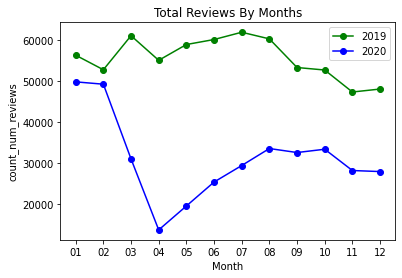

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

reviews2019DF = review_2019DF.toPandas()
reviews2020DF = review_2020DF.toPandas()

# number of reviews
Y2019 = reviews2019DF.count_num_reviews
Y2020 = reviews2020DF.count_num_reviews
month = reviews2020DF.Month

# plot two lines
plt.plot(month, Y2019, 'o-g')
plt.plot(month, Y2020, 'o-b')
# set axis titles
plt.xlabel("Month")
plt.ylabel("count_num_reviews")
# set chart title
plt.title("Total Reviews By Months")
# legend
plt.legend(['2019', '2020'])
plt.show()

### The average star rating of both closed and still open restaurant
This 2 graphs show the average star rating of 2 restaurants which one is closed and has the highest number of reviews in the restuarants that have closed, and another one is still open and has the highest number of reviews in the restuarants that is still open. Top is closed restaurant, below is open restaurant.
From the graphs, we can see that the average rating for the business that closed has descreased throughout the year while the restaurant that is still open, their average star rating has increased throughout the year. Hence, from this, we can see that why the business will close and why the business is still open has it reason. Therefore, a good restaurant must ensure they maintain or get better star rating so that their business will face the risk of closing down.

In [0]:
closed_avg_stars.display()
open_avg_stars.display()

business_id,review_stars,year
zioLxtBc9THNS2TOn9xW1w,4,2020-01-01
zioLxtBc9THNS2TOn9xW1w,1,2020-01-01
zioLxtBc9THNS2TOn9xW1w,4,2020-01-01
zioLxtBc9THNS2TOn9xW1w,5,2020-01-01
zioLxtBc9THNS2TOn9xW1w,4,2020-01-01
zioLxtBc9THNS2TOn9xW1w,2,2020-01-01
zioLxtBc9THNS2TOn9xW1w,5,2020-01-01
zioLxtBc9THNS2TOn9xW1w,4,2020-01-01
zioLxtBc9THNS2TOn9xW1w,3,2020-01-01
zioLxtBc9THNS2TOn9xW1w,5,2020-01-01


business_id,review_stars,year
4CxF8c3MB7VAdY8zFb2cZQ,5,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,5,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,4,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,4,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,4,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,5,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,4,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,5,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,5,2020-01-01
4CxF8c3MB7VAdY8zFb2cZQ,3,2020-01-01


### Total number of count review stars by year 2019 and 2020 for the business which has the highest reviews counts but was closed
This visualisation shows the restaurant that has highest number of reviews but was closed. Number of count review stars shows how good the business is by adding up all the stars by month. In 2919, the count of review stars for restaurant was still better than in 2020 but was not vert stable. While there was an extreme big descreasing in 2020 and even the number of count stars did not increase throughout the year. In above we say that we recommend restaurants to have food delivery service but this restaurant actually provided restaurant delivery however the business still did not become better and even closed after that. Thus, in the next visualisation, we will analyse what customers said the most in their reviews.

In [0]:
num_reviews_2019.display()
num_reviews_2020.display()

Month,count_num_reviews
01,57
02,33
03,49
04,48
05,41
06,42
07,51
08,62
09,57
10,42


Month,count_num_reviews
01,35
02,29
03,12
04,5
05,1
07,1
08,4
09,3
10,4
11,1


### Word count for the restaurant
These are the count of words from the reviews where customers leave their reviews for this restaurants. I picked the above restaurant that has the highest number of reviews to see what the customers have mentioned in their reviews so that other restaurants will know which areas the customers are looking for to give good reviews so that the restaurant will not be closed.

In [0]:
wordcountDF.display()

word,count
the,1277
and,836
a,572
to,546
i,500
was,469
of,396
is,320
it,300
we,285


From all the words in the reivews, I picked up some words that might be useful for analysing the words that customers said many times in their reviews. 
In this visualisatio we can see that many people have said about the "Pok" which it's one their signature dish. Well, other than "Pok", there are also some words like "wings", "food", "sauce", "fish", "chicken" etc... Thus, we can say that many people are most concerned about the food quality rather than the service quality or environment of the restaurant. Therefore, from all the analysis, I conclude that the food quality is the most important factor that will affect the restaurants the most. Hence, in order for a restaurant to get a high star rating, high number of reviews, and not close, the restuarant must ensure their food taste good and nice. Then the other 2 factors are the place and service.

In [0]:
top_wordcountDF.display()

word,count
pok,217
wings,176
food,135
sauce,112
fish,105
chicken,101
thai,99
good,87
place,82
time,42
